# This is First task of CodSoft Data Science Internship 

We have to build a model that predicts whether a passenger will survive or not .

In [108]:
# Importing required libraries for this  model 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#code for removing warning error 
import warnings
warnings.filterwarnings('ignore')

In [109]:
# Importing and reading the Dataset
data = pd.read_csv('Titanic_dataset.csv')

In [110]:
# dispalying the dataset 
print(data.shape)

data.head(10)



(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


The data set contains 418 passengers and 12 columns which include passengers details

In [111]:
print(" The dataset contains "+ str(len(data)) + " observations ")
print ( " The dataset contains " + str(len(data.columns)) + " parameters/variables")

 The dataset contains 418 observations 
 The dataset contains 12 parameters/variables


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


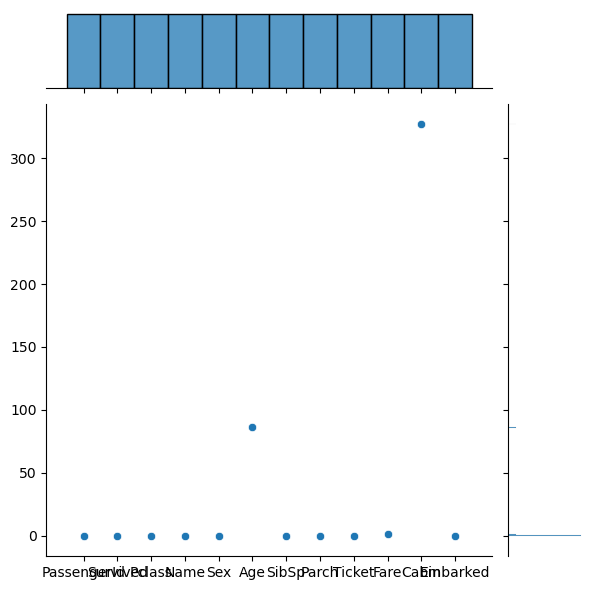

In [112]:
# checking of any null values in the dataset
print(data.isnull().sum())


sns.jointplot(data.isnull().sum())

As we can observe there are columns which has null value 

In [113]:
# printing the only missing values entry
data_null = data[data.isnull().any(axis=1) ]

data_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [114]:
# droping the Cabin column from dataset
data = data.drop(['Cabin'],axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [115]:
# again checking for null values 
data.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [116]:
# filling the null values with mean 
data = data.fillna(data['Age'].mean())
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


<Figure size 20000x30000 with 0 Axes>

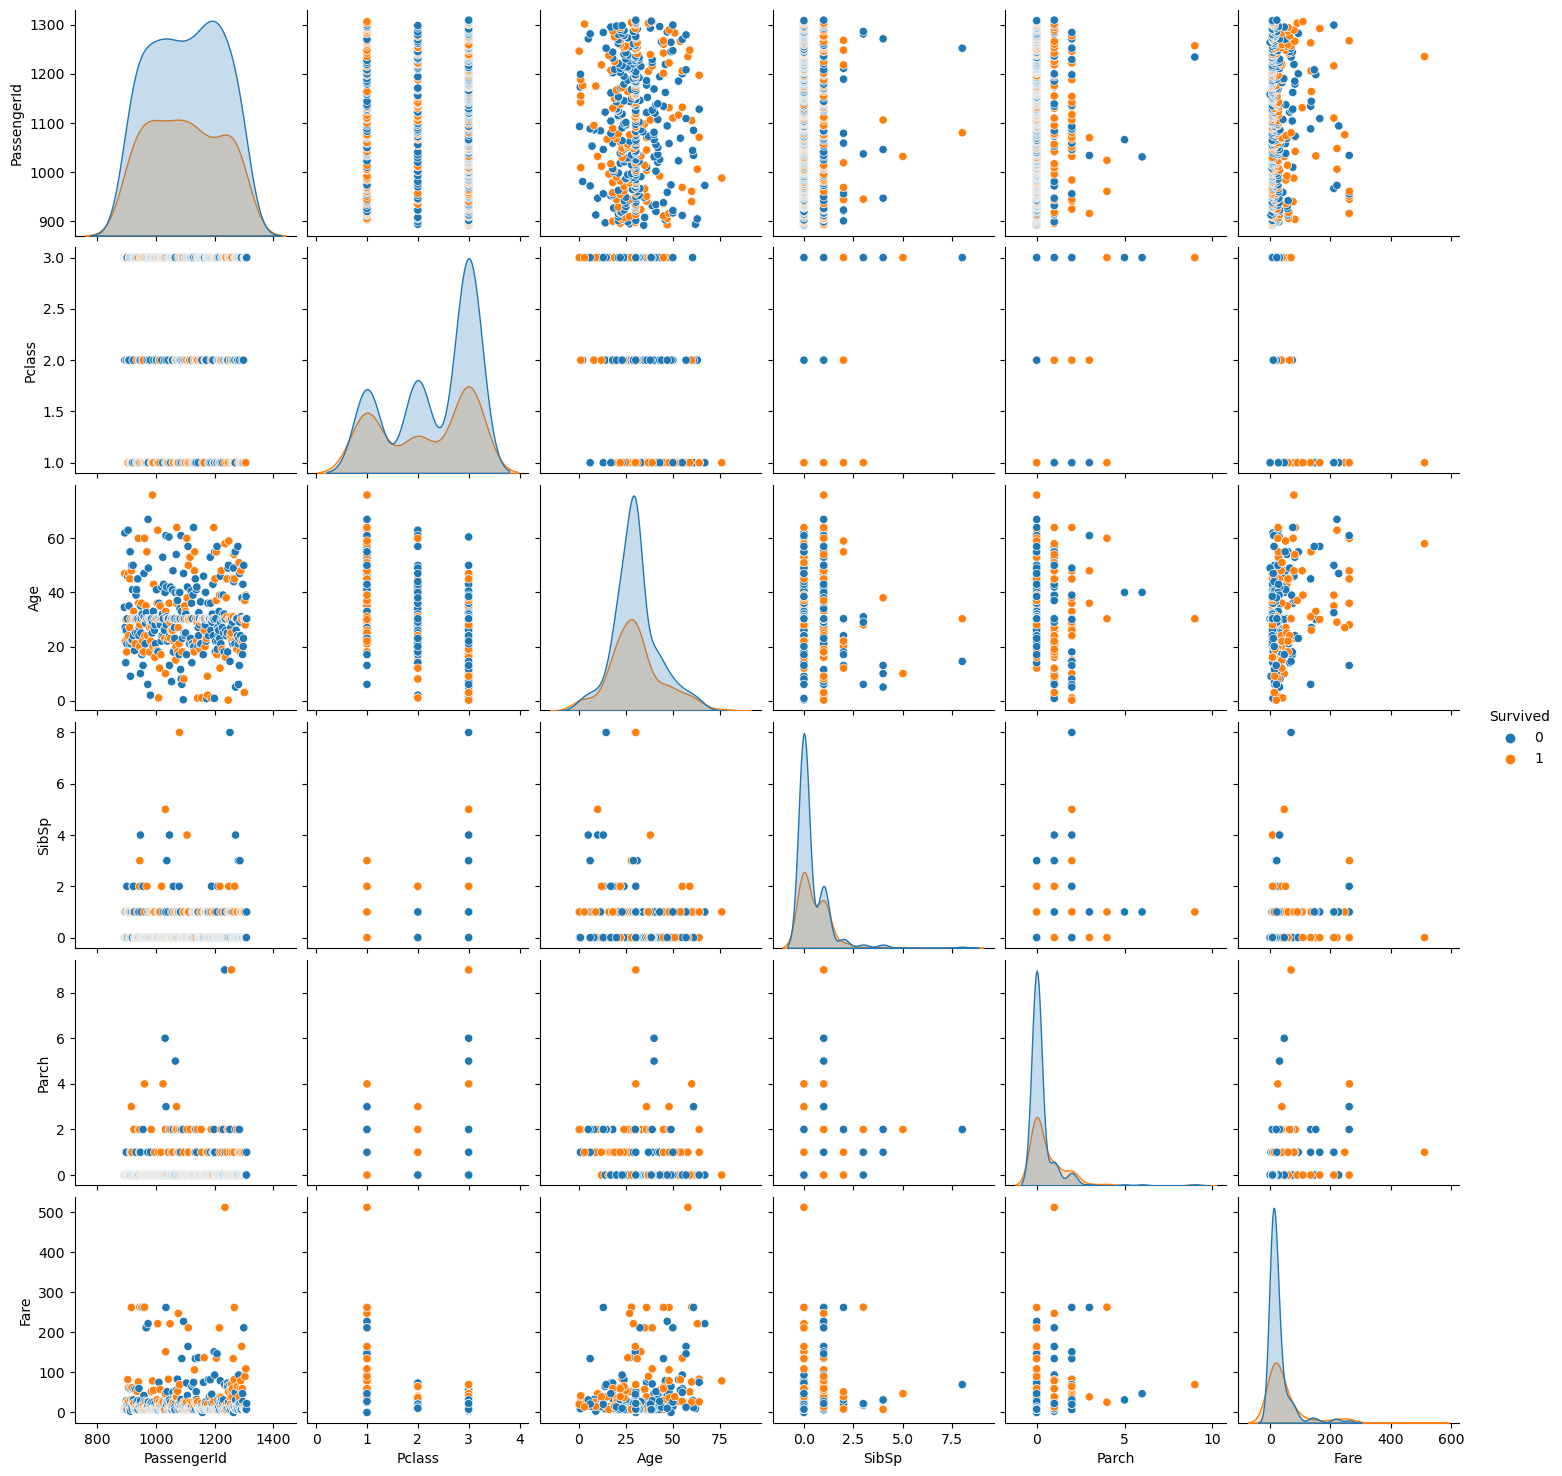

In [117]:
# Using the graph to  relations between survival and different parameters
plt.figure(figsize=(200,300))
sns.pairplot(data=data,hue='Survived')
data = data.drop(['Name'],axis=1)

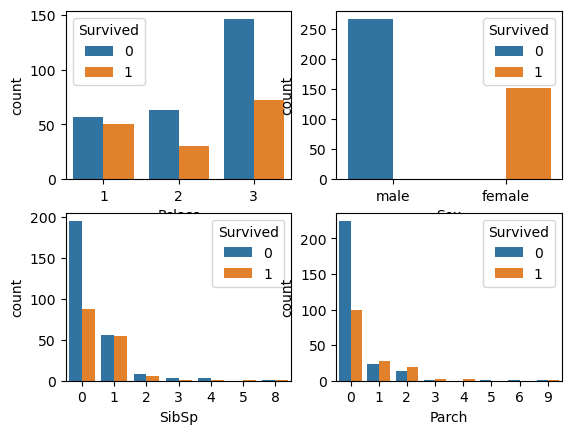

In [118]:
#  checking for particular parameter
plt.subplot(2,2,1);
sns.countplot(data=data, x='Pclass',hue='Survived');
plt.subplot(2,2,2);
sns.countplot(data=data , x='Sex',hue='Survived');
plt.subplot(2,2,3);
sns.countplot(data=data,x='SibSp',hue= 'Survived');
plt.subplot(2,2,4);
sns.countplot(data=data,x='Parch',hue= 'Survived');


In [119]:
# from the above graph we can say that survival depends on [ Pclass,Sex,Age,SibSp, Parch,Embarked]
# the spliting the dataset intotrain test model 


In [120]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.614378
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.841115
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [121]:
# we can observe columns of Age And embarked are not showing in the describe function because they are object type 
# so, we have to convert it into int type using  label  encoder 
from sklearn.preprocessing import LabelEncoder
sex = list(data['Sex'])
embarked= list(data['Embarked'])
#print(sex,embarked)
encoder_sex= LabelEncoder()
encoder_embarked= LabelEncoder()
encoded_sex= encoder_sex.fit_transform(sex)
encoded_embarked = encoder_embarked.fit_transform(embarked)

data['Sex']=encoded_sex
data['Embarked']=encoded_embarked

In [122]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.50000,1204.750000,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.00000,1.000000,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.00000,3.000000,3.0000
Sex,418.0,0.636364,0.481622,0.00,0.0000,1.00000,1.000000,1.0000
Age,418.0,30.272590,12.634534,0.17,23.0000,30.27259,35.750000,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.00000,1.000000,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.00000,0.000000,9.0000
Fare,418.0,35.614378,55.841115,0.00,7.8958,14.45420,31.471875,512.3292
Embarked,418.0,1.401914,0.854496,0.00,1.0000,2.00000,2.000000,2.0000


In [123]:
# now we have sucessfully encoded our data 



y = data['Survived']
x = data[['Pclass','Sex','Age','SibSp','Fare']]

x.describe()



,Pclass,Sex,Age,SibSp,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,30.272590,0.447368,35.614378
std,0.841838,0.481622,12.634534,0.896760,55.841115
min,1.000000,0.000000,0.170000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,7.895800
50%,3.000000,1.000000,30.272590,0.000000,14.454200
75%,3.000000,1.000000,35.750000,1.000000,31.471875
max,3.000000,1.000000,76.000000,8.000000,512.329200


In [124]:
# training the model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.9,random_state=30)

In [127]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression()
model_3.fit(X_train,Y_train)
Y_pred_3=model_3.predict(X_test)
accuracy_3=accuracy_score(Y_test,Y_pred_3)*100
print("Accuracy of Logistic Regression :",accuracy_3)

Accuracy of Logistic Regression : 97.08222811671088


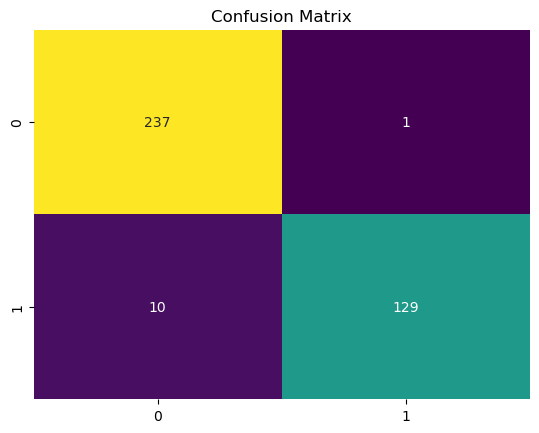

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_3)
plt.xlabel('Y_pred_3')
plt.ylabel('Y_test')
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', cbar=False)
plt.show()

In [138]:
from sklearn.naive_bayes import GaussianNB
model_1 = GaussianNB()
model_1.fit(X_train,Y_train)

Y_pred_1 = model_1.predict(X_test)

# Calculate the accuracy of the model
accuracy_1 = accuracy_score(Y_test, Y_pred_1)*100
print("Accuracy of GaussianNb :", accuracy_1)


Accuracy of GaussianNb : 100.0


In [139]:
from sklearn.svm import SVC
model_2 = SVC( kernel= 'linear')
model_2.fit(X_train,Y_train)
Y_pred_2 = model_2.predict(X_test)
accuracy_2= accuracy_score(Y_test,Y_pred_2)*100
print( " Accuray of SVM classifier :",accuracy_2)

 Accuray of SVM classifier : 100.0


# Thank You !
